<a href="https://colab.research.google.com/github/user8391/Deep-Learning-/blob/main/Overfitting_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overfitting - Model Learns too much from the training dataset and deduces noise as hidden patterns in the dataset , leading to good performance with training dataset but often terrible performance with testing dataset .

Methods to avoid Overfitting -
1 . CROSS VALIDATION
2 . Use REGULARIZATION

# Implementing Cross Validation manually using numpy

In [ ]:
# ALL Data = Training set(usually 80%) + Hold out set devset 10%  + Test set 10%
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns

In [ ]:
# Loading dataset
iris = sns.load_dataset('iris') # dataframe

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(data.shape[0], dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [ ]:
# Seperating dataset into train and test (no devset here)
'important changes'

# how many training examples
training_proportion = 0.8
training_quantity = int(training_proportion*len(labels) )

# creating bool vector to choose from the dataset
train_test_bool = np.zeros(len(labels) , dtype = bool)

# randomly selecting points from the dataset
randomizing_selection = np.random.choice(range(len(labels)),training_quantity , replace = False)
train_test_bool[randomizing_selection] = True

train_test_bool

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,

In [ ]:
model = nn.Sequential(
    nn.Linear(4,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,3)
)

epochs = 1000
losses = np.zeros(epochs)
current_acc = []
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

for epochi in range(epochs):

    'important changes'
    # forward
    yHat = model(data[train_test_bool , :]) # only trains on the instances where the value of train_test_bool is True

    current_acc.append(100*torch.mean((torch.argmax(yHat , axis = 1) == labels[train_test_bool]).float()))

    # losses
    loss = loss_fn(yHat , labels[train_test_bool])
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# final training data forward pass
yHat = model(data[train_test_bool , :]) # for training data
trainingacc = 100*torch.mean((torch.argmax(yHat , axis = 1) == labels[train_test_bool]).float())

# final test accuracy
yHat = model(data[~train_test_bool , :])  # ~ for testing data as '~' negates the Trues
testingacc = 100*torch.mean((torch.argmax(yHat , axis = 1) == labels[~train_test_bool]).float())

print(f'training acc: {trainingacc}')
print(f'testing acc: {testingacc}')


training acc: 99.16666412353516
testing acc: 96.66666412353516


# Cross validation with scikitlearn


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# New
from sklearn.model_selection import train_test_split # function is used for splitting the data into training set and testing set

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(data.shape[0] , dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

# the given function splits the data and their labels into training data , labels and testing data , labels
# makes it very easy as compared to building logically from ground up

training_data , testing_data , training_labels , testing_labels = train_test_split(data , labels , test_size=0.2)
# test_size tells the function about the size of the proportion
# or use train size
# train_size tells the function about the size of the proportion

# It also Randomizes the training and the testing data by default without changing the order of features | to disable type shuffle = False

print(training_data.shape)
print(testing_data.shape)
print(training_labels)
print(testing_labels)

torch.Size([120, 4])
torch.Size([30, 4])
tensor([1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2,
        2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0,
        2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2,
        1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0,
        0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2])
tensor([2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0,
        2, 1, 0, 0, 1, 0])


In [ ]:
model = nn.Sequential(
    nn.Linear(4,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,3)
)

epochs = 1000
losses = np.zeros(epochs)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

for epochi in range(epochs):


    # forward
    yHat = model(training_data) # only trains on the instances where the value of train_test_bool is True



    # losses
    loss = loss_fn(yHat , training_labels)
    losses[epochi] = loss.detach()

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# final training data forward pass
yHat = model(training_data) # for training data
trainingacc = 100*torch.mean((torch.argmax(yHat , axis = 1) == training_labels).float())

# final test accuracy
outputs = model(testing_data)
testingacc = 100*torch.mean((torch.argmax(outputs , axis = 1) == testing_labels).float())

print(f'training acc: {trainingacc}')
print(f'testing acc: {testingacc}')

training acc: 98.33333587646484
testing acc: 96.66666412353516


# Cross validation using Data-Loaders

In [2]:
# will be used when using with pytorch

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# New
from torch.utils.data import DataLoader , TensorDataset # tensordataset merges data and labels into one dataset and dataloader converts it to batches

In [3]:
import seaborn as sns

iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(data.shape[0],dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2
print(data.shape)
print(labels.shape)


torch.Size([150, 4])
torch.Size([150])


In [4]:
# seperating training data
train_data , test_data , train_labels , test_labels = train_test_split(data , labels , test_size = 0.2)

# converting them into pytorch datasets
train_data = TensorDataset(torch.Tensor(train_data) , torch.Tensor(train_labels))
test_data = TensorDataset(torch.Tensor(test_data) , torch.Tensor(test_labels))


# translating to dataloader objects
train_loader = DataLoader(train_data , batch_size = 9) # converts training data to batches
test_loader = DataLoader(test_data , batch_size=len(test_labels)) # converts testing data to batches
# shuffle randomizes the data , batch size sets the size of a batch
# loader is an iterable object

# for data , labels in loader:
#     print(data)
#     print(labels)
#     break

for batch , labels in train_loader:
    print(batch.shape)
    print(labels.shape)
    break

for data , label in test_loader:
  print(data.shape)

torch.Size([9, 4])
torch.Size([9])
torch.Size([30, 4])


[np.float32(34.920643), np.float32(35.71429), np.float32(38.888893), np.float32(64.28572), np.float32(68.253975), np.float32(69.84127), np.float32(70.63492), np.float32(69.84127), np.float32(69.84127), np.float32(73.01588), np.float32(75.396835), np.float32(79.36509), np.float32(81.74603), np.float32(84.12699), np.float32(85.714294), np.float32(87.30159), np.float32(88.09524), np.float32(88.88889), np.float32(90.4762), np.float32(90.4762), np.float32(91.269844), np.float32(89.68254), np.float32(88.09524), np.float32(88.09524), np.float32(88.09524), np.float32(88.88889), np.float32(88.88889), np.float32(88.88889), np.float32(88.88889), np.float32(88.88889), np.float32(89.68254), np.float32(90.47619), np.float32(90.47619), np.float32(90.47619), np.float32(91.269844), np.float32(91.269844), np.float32(92.06349), np.float32(92.06349), np.float32(92.06349), np.float32(92.06349), np.float32(92.06349), np.float32(92.06349), np.float32(92.06349), np.float32(92.06349), np.float32(92.85714), np.

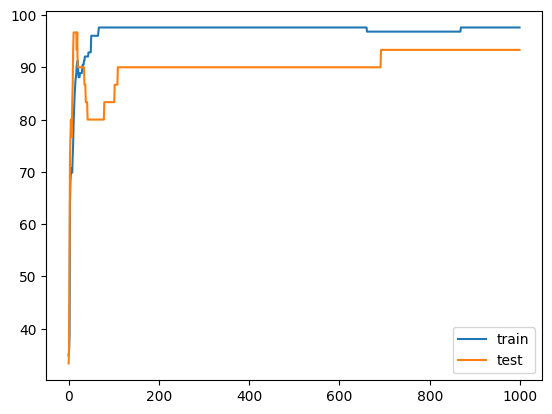

In [7]:
# Architecture
model = nn.Sequential(
    nn.Linear(4,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,3)
)

epochs = 1000
losses = np.zeros(epochs)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

def train_model():
  trainAcc = []
  testAcc = []

  # training
  for epochi in range(epochs):

    batchAcc = []


    # looping over batches
    for batch , labels in train_loader:

      # forward
      yHat = model(batch)
      loss = loss_fn(yHat , labels)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      batchAcc.append(100*torch.mean((torch.argmax(yHat , axis = 1) == labels).float()))
      # end of batch loop

    # average accuracy of the batches
    trainAcc.append(np.mean(batchAcc))

    # testing accuracy
    X,y = next(iter(test_loader)) # exact X , y from testloader
    outputs = torch.argmax(model(X) , axis = 1)
    testAcc.append(100*torch.mean((outputs == y).float()))

  # output
  return trainAcc , testAcc


train_acc , test_acc = train_model()

print(train_acc)
print(test_acc)

plt.plot(train_acc , label = 'train')
plt.plot(test_acc , label = 'test')
plt.legend()
plt.show()



# very interesting result , the model trains exceptionally well in very less epochs with seemingly minor additions



# Partitioning the data into train-test-split

In [8]:
# Using scikitlearn
import numpy as np
from sklearn.model_selection import train_test_split



In [10]:
# Fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10) > 4
print(fakedata)
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
[False False False False False  True  True  True  True  True]


In [13]:
# sizes of the partition
training_size = 0.8

# Split the data on training data and integrated testing data (devset + training)
train_data , test_integrated_data , train_labels , test_integrated_labels = train_test_split(fakedata , fakelabels , train_size = training_size)

# Splitting  the integrated data
# of the integrated data -
devset_size = 0.5

devset_data , test_data , devset_labels , test_labels = train_test_split(test_integrated_data , test_integrated_labels , train_size = devset_size)

print("training set :" , train_data.shape)
print("devset :" , devset_data.shape)
print("testing set :" , test_data.shape)

train_data

# we just run train_test_split twice




training set : (8, 4)
devset : (1, 4)
testing set : (1, 4)


array([[ 71,  72,  73,  74],
       [ 91,  92,  93,  94],
       [101, 102, 103, 104],
       [ 81,  82,  83,  84],
       [ 51,  52,  53,  54],
       [ 21,  22,  23,  24],
       [ 31,  32,  33,  34],
       [ 11,  12,  13,  14]])

In [19]:
# manually partitioning using numpy
randomized_indices = np.random.permutation(range(len(fakelabels)))
print(randomized_indices)

# creating training data and labels
train_data = fakedata[randomized_indices[:8],:]
train_labels = fakelabels[randomized_indices[:8]]

# creating devset
devset_data = fakedata[randomized_indices[8:9],:]
devset_labels = fakelabels[randomized_indices[8:9]]

# creating test set
test_data = fakedata[randomized_indices[9:10],:]
test_labels = fakelabels[randomized_indices[9:10]]

print(train_data.shape)
print(train_labels)
print(devset_data.shape)
print(devset_labels)
print(test_data.shape)
print(test_labels)

# if we change features of the model and test according to that ,then we need devset , otherwise we do not need a seperate devset

[2 1 8 0 7 4 5 9 3 6]
(8, 4)
[False False  True False  True False  True  True]
(1, 4)
[False]
(1, 4)
[ True]


# Cross validation on regression

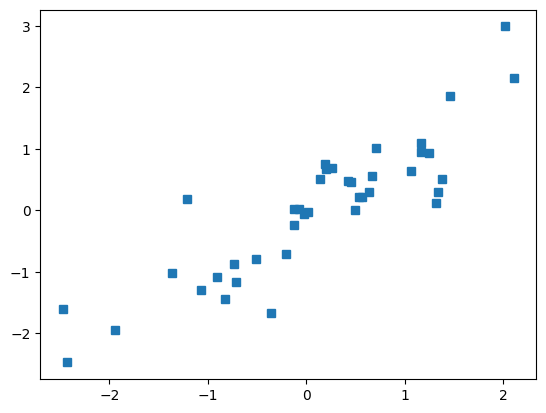

In [32]:
# Implementing cross validation on previous regression code

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creating data
N = 40
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# Plot
plt.plot(x,y,'s')
plt.show()

# Model Building


ANN_regression = nn.Sequential(

    nn.Linear(1,1)
)

# Setting Meta Parameters

# Learning Rate
learning_rate = 0.04

# Loss Function
loss_function = nn.MSELoss() # Mean square error loss function

# Optimizer (The "Flavor" of gradient descent to implement)
optimizer = torch.optim.SGD(ANN_regression.parameters(), lr = learning_rate) # will be discussed later (Secastic gradient discent)





In [33]:
# Selecting training data
Proportion_train = .8
trainidx = np.random.choice(range(len(x)),int(Proportion_train*len(x)),replace = False) # random indices

trainBool = np.zeros(len(x),dtype=bool) # Initialize vectors to falses
trainBool[trainidx] = True # set selected samples to true



Model Training

training loss: 0.30270078778266907
testing loss: 0.1867274045944214


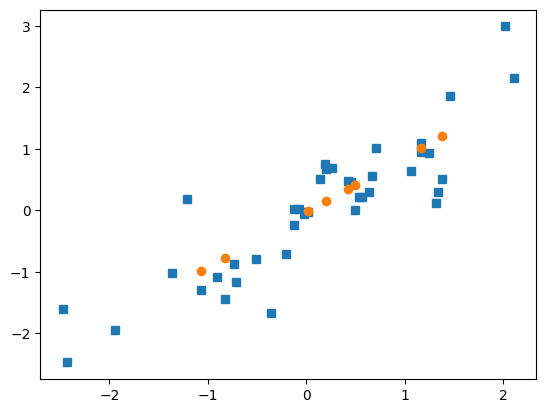

In [34]:
numepochs = 500
for epochi in range(numepochs):

  yHat = ANN_regression(x[trainBool,:]) # forward

  loss = loss_function(yHat,y[trainBool])

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

predYtest = ANN_regression(x[~trainBool,:]) # forward
testloss = (predYtest-y[~trainBool]).pow(2).mean()

print(f'training loss: {loss.detach()}')
print(f'testing loss: {testloss.detach()}')

# Plot
plt.plot(x,y,'s')
plt.plot(x[~trainBool,:],predYtest.detach(),'o')
plt.show()
